In [102]:
import io
import onnxruntime as ort
import torch.utils.model_zoo as model_zoo
import torch.onnx
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt
import json
from PIL import Image, ImageDraw, ImageFont
from resizeimage import resizeimage
import numpy as np
import pdb
import onnx

%matplotlib inline

In [103]:
# Just to make the unavoidable warnings quiet :)
import shutup

shutup.please()

In [97]:
def preprocess_image(image_path, height, width, channels=3):
    image = Image.open(image_path) #Opens Image at specified Path
    orig_dim= list(image.size)
    image_res = image.resize((width, height), Image.ANTIALIAS) #Resizes Image to given width/height
    image_res = image_res.convert("RGB")
    image_d = np.asarray(image_res).astype(np.float32) #Transforms image to a [Height,Width,Channel] array format.i.e. (128,128,3)
    image_data = image_d.transpose([2, 0, 1])  # transpose to [Channel,Height,Width] format
    
#     ##########USED IN PREVIOUS MODEL, DOES NOT WORK WITH THIS#########
#     mean = np.array([0.079, 0.05, 0]) + 0.406
#     std = np.array([0.005, 0, 0.001]) + 0.224
#     for channel in range(image_data.shape[0]):
#         image_data[channel, :, :] = (
#             image_data[channel, :, :] / 255 - mean[channel]) / std[channel]
#     image_dat = np.expand_dims(image_data, 0)
#     return image_dat, orig_dim
#     ##################################################################

    image_dat = np.expand_dims(image_data /255 , axis=0)
    return image_dat, orig_dim

im_height = 128 #row
im_width = 128 #column
im_path = "C:/Users/t-viykeosuji/Documents/testing/images/test_16.png" #Input your own Image Path here
image_data, orig_dim = preprocess_image(im_path, im_height, im_width)

print(orig_dim)
print(image_data.shape, sep="\n\n")

[551, 533]
(1, 3, 128, 128)


In [98]:
# Input your Onnx Model Directory here
ort_session = ort.InferenceSession("C:/Users/t-viykeosuji/Downloads/SuperRes_BuildDemo_Models/Models/srgan_generator.onnx")
ort_inputs = {ort_session.get_inputs()[0].name: image_data} 
ort_outs = ort_session.run(None, ort_inputs)
img_out_y = ort_outs[0]




In [99]:
img_out_a = Image.fromarray(np.uint8((img_out_y[0] * 255.0).clip(0, 255)[0]), mode='L')
img_out_b = Image.fromarray(np.uint8((img_out_y[0] * 255.0).clip(0, 255)[1]), mode='L')
img_out_c = Image.fromarray(np.uint8((img_out_y[0] * 255.0).clip(0, 255)[2]), mode='L')


# get the output image follow post-processing step from PyTorch implementation
final_img = Image.merge(
    "RGB", [
        img_out_a,
        img_out_b,
        img_out_c
    ])
final = final_img.resize(orig_dim, Image.ANTIALIAS)

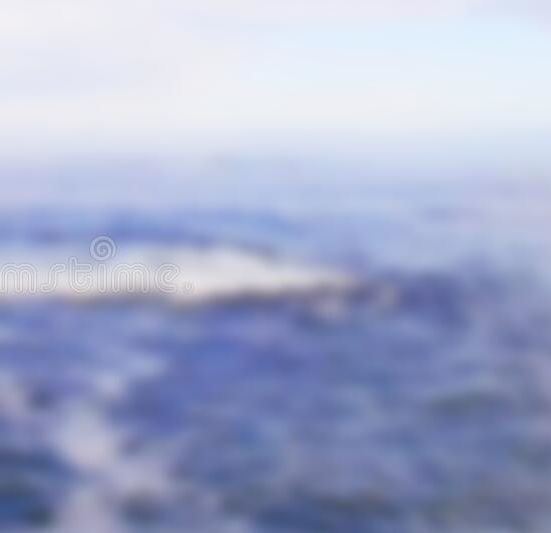

In [100]:
original = Image.open(im_path)
original

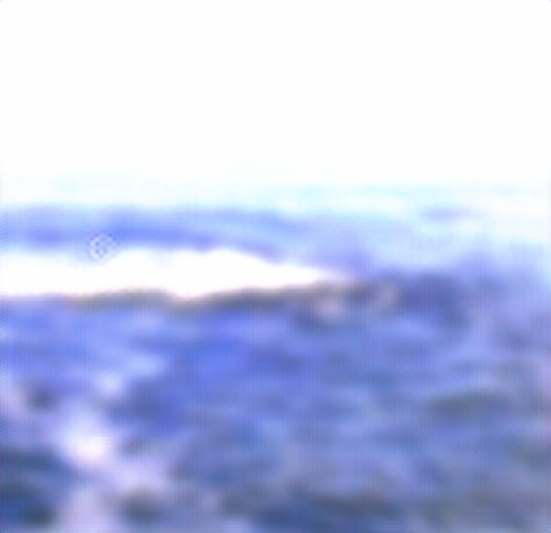

In [101]:
final